Библиотеки

In [104]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import cv2

1. Прочитайте изображение из файла и выведите его на экран:

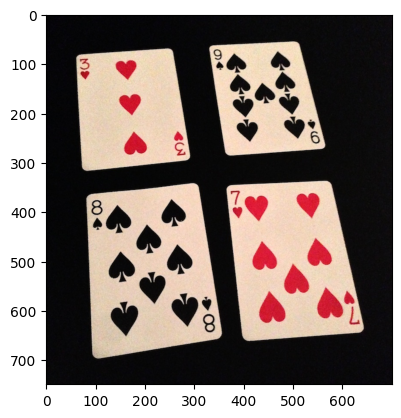

In [301]:
img_link = "http://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png"
img = imread(img_link)
plt.imshow(img)

2. Выполните последоватьельно 2 преобразования: переведите изображение в оттенки серого (COLOR_BGR2GRAY) и примените размытие (GaussianBlur):


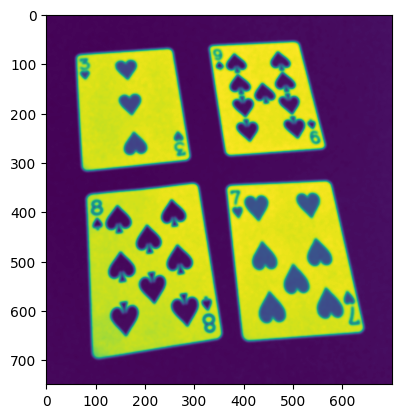

In [302]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (13, 13), 0)
plt.imshow(blur)
plt.show()

3. Найдите 4 контура максимального размера и выведите их на исходном изображении:

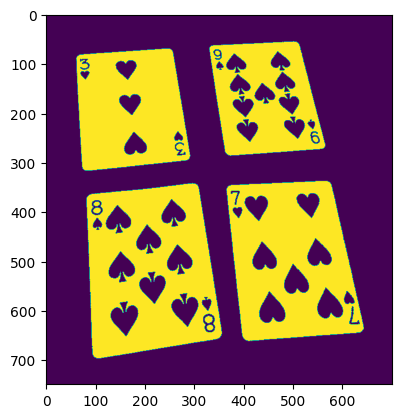

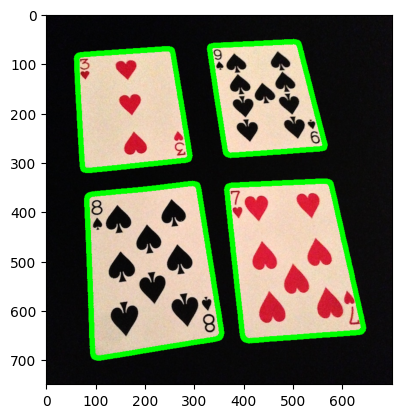

In [303]:
numcards = 4

flag, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)
plt.show()
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:numcards]

contours_img = img.copy()
cv2.drawContours(contours_img, contours, contourIdx=-1, color=(0, 255, 0, 255), thickness=10)
plt.imshow(contours_img)
plt.show()


 4. Примените к каждому контуру проективное преобразование и выведите отдельным изображением:


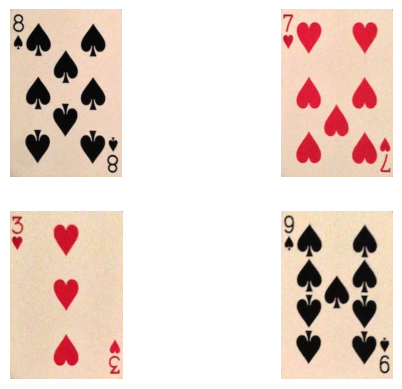

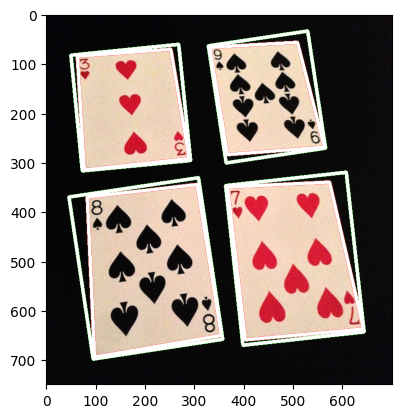

In [304]:
img_copy = img.copy()
warps = []
for i in range(numcards):
    card = contours[i]
    peri = cv2.arcLength(card, True)
    approx = np.array(cv2.approxPolyDP(card, 0.02 * peri, True), np.float32)
    cv2.polylines(img_copy, [approx.astype(int)], isClosed=True, color=(255, 0, 0), thickness=5)
    rect = cv2.minAreaRect(contours[i])
    r = cv2.boxPoints(rect)
    cv2.polylines(img_copy, [r.astype(int)], isClosed=True, color=(0, 255, 0), thickness=5)
    h = np.array([[0, 0], [200, 0], [200, 300], [0, 300]], np.float32)
    transform = cv2.getPerspectiveTransform(approx, h)
    warp = cv2.warpPerspective(img, transform, (200, 300))[:, ::-1]
    warps.append(warp)
    plt.subplot(2, 2, i + 1)
    plt.axis("off")
    plt.imshow(warp)
plt.show()
plt.imshow(img_copy)
plt.show()

5. Найдите количество символов на одной карте:
- на изображение карты найдите все контуры;
- найдите максимальный контур (не совпадающий с самой картой);
- найдите другие контуры, отличающиеся от максимального по размеру не более 10%;
- посчитайте количество максимальных контуров.

In [ ]:
for (i, warp) in enumerate(warps):
    img_gray = cv2.cvtColor(warp, cv2.COLOR_RGB2GRAY)
    contours_img = warp.copy()

    flag, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    main_contours = []
    main_area = 0
    for contour in contours:
        if cv2.contourArea(contour) > 0.9 * warp.shape[0] * warp.shape[1]:
            continue
        if main_area == 0:
            main_contours.append(contour)
            main_area = cv2.contourArea(contour)
        else:
            if main_area / 1.1 < cv2.contourArea(contour) < main_area * 1.1:
                main_contours.append(contour)
    print(len(main_contours))

    cv2.drawContours(contours_img, main_contours, contourIdx=-1, color=(0, 255, 0, 255), thickness=2)
    plt.subplot(2, 2, i + 1)
    plt.imshow(contours_img)
plt.show()

Всё в одном

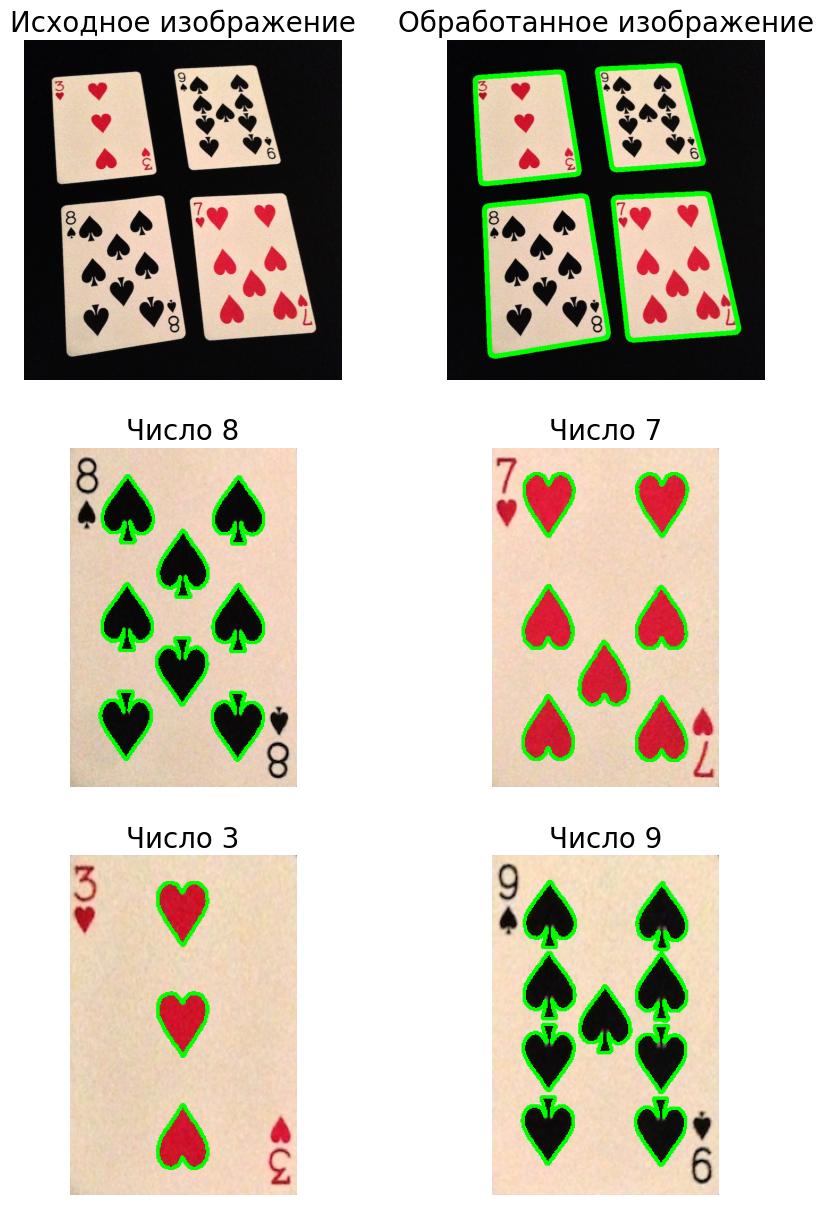

In [294]:
img_link = "http://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png"
img = imread(img_link)

font_size = 20
plt.figure(figsize=(10, 15), facecolor=(0, 0, 0, 0))
plt.subplot(3, 2, 1).set_title("Исходное изображение", fontsize=font_size)
plt.axis("off")
plt.imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (13, 13), 0)

numcards = 4

flag, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:numcards]

contours_img = img.copy()
cv2.drawContours(contours_img, contours, contourIdx=-1, color=(0, 255, 0, 255), thickness=10)
plt.subplot(3, 2, 2).set_title("Обработанное изображение", fontsize=font_size)
plt.axis("off")
plt.imshow(contours_img)

img_copy = img.copy()
warps = []
for i in range(numcards):
    card = contours[i]
    peri = cv2.arcLength(card, True)
    approx = np.array(cv2.approxPolyDP(card, 0.02 * peri, True), np.float32)
    h = np.array([[0, 0], [200, 0], [200, 300], [0, 300]], np.float32)
    transform = cv2.getPerspectiveTransform(approx, h)
    warp = cv2.warpPerspective(img, transform, (200, 300))[:, ::-1]
    warps.append(warp)

for (i, warp) in enumerate(warps):
    img_gray = cv2.cvtColor(warp, cv2.COLOR_RGB2GRAY)
    contours_img = warp.copy()

    flag, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    main_contours = []
    main_area = 0
    for contour in contours:
        if cv2.contourArea(contour) > 0.9 * warp.shape[0] * warp.shape[1]:
            continue
        if main_area == 0:
            main_contours.append(contour)
            main_area = cv2.contourArea(contour)
        else:
            if main_area / 1.1 < cv2.contourArea(contour) < main_area * 1.1:
                main_contours.append(contour)

    cv2.drawContours(contours_img, main_contours, contourIdx=-1, color=(0, 255, 0, 255), thickness=2)
    plt.subplot(3, 2, i + 3).set_title(f"Число {len(main_contours)}", fontsize=font_size)
    plt.axis("off")
    plt.imshow(contours_img)
plt.show()